In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

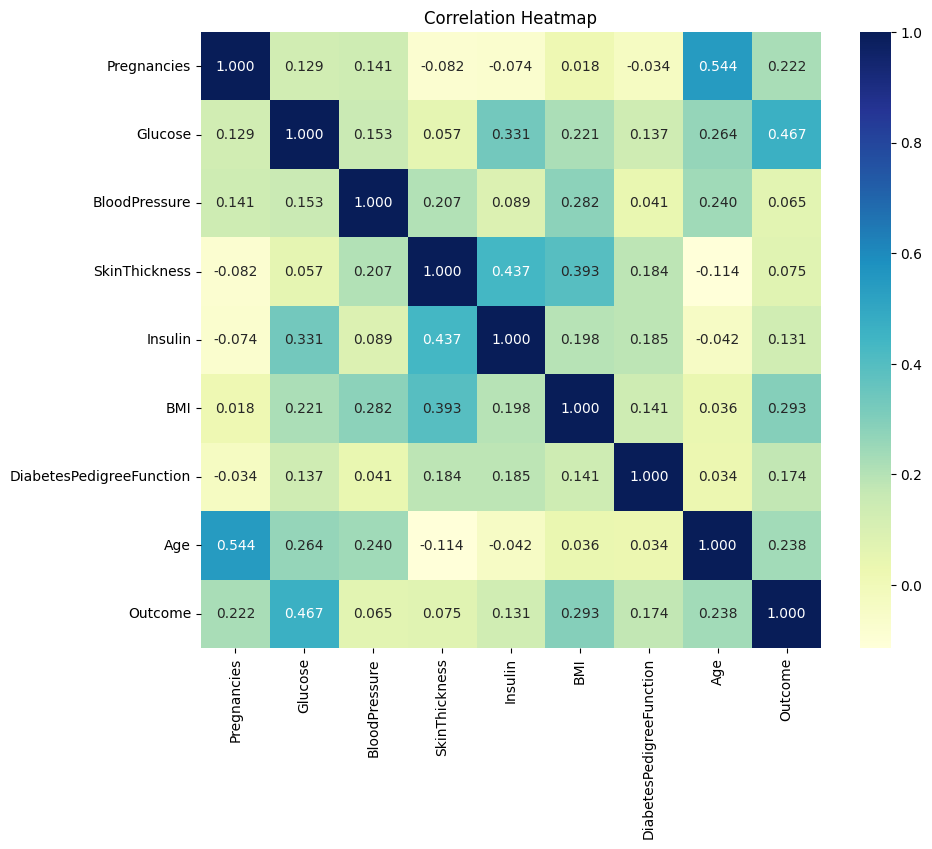

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu', fmt='.3f',)
plt.title('Correlation Heatmap')
    

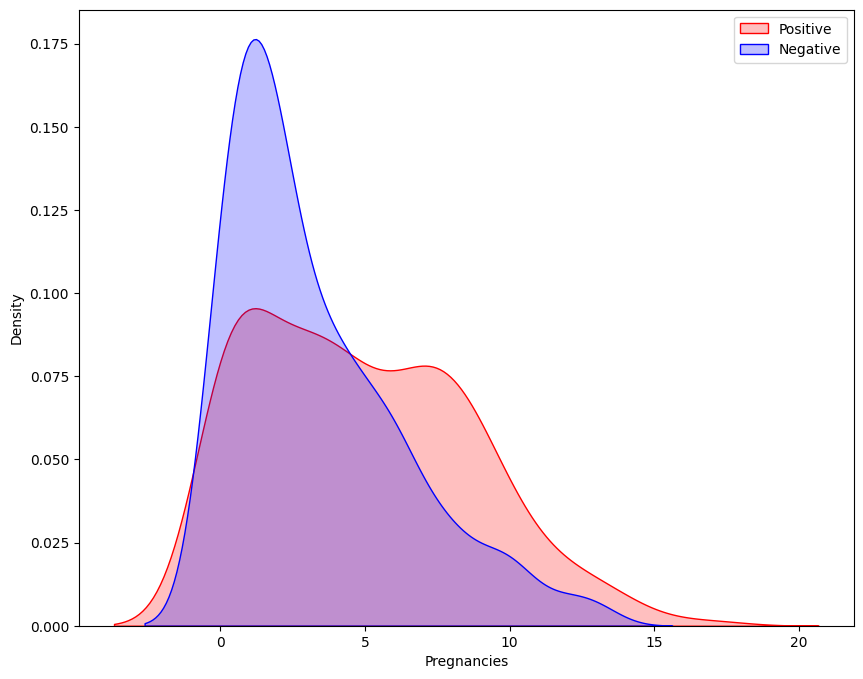

In [ ]:
plt.figure(figsize=(10,8))


sns.kdeplot(dataset[dataset['Outcome'] == 1]['Pregnancies'], color='red', fill=True, label='Positive')

sns.kdeplot(dataset[dataset['Outcome'] == 0]['Pregnancies'], color='blue', fill=True, label='Negative')


plt.xlabel('Pregnancies')
plt.ylabel('Density')


plt.legend()

plt.show()

<Axes: xlabel='Outcome', ylabel='Glucose'>

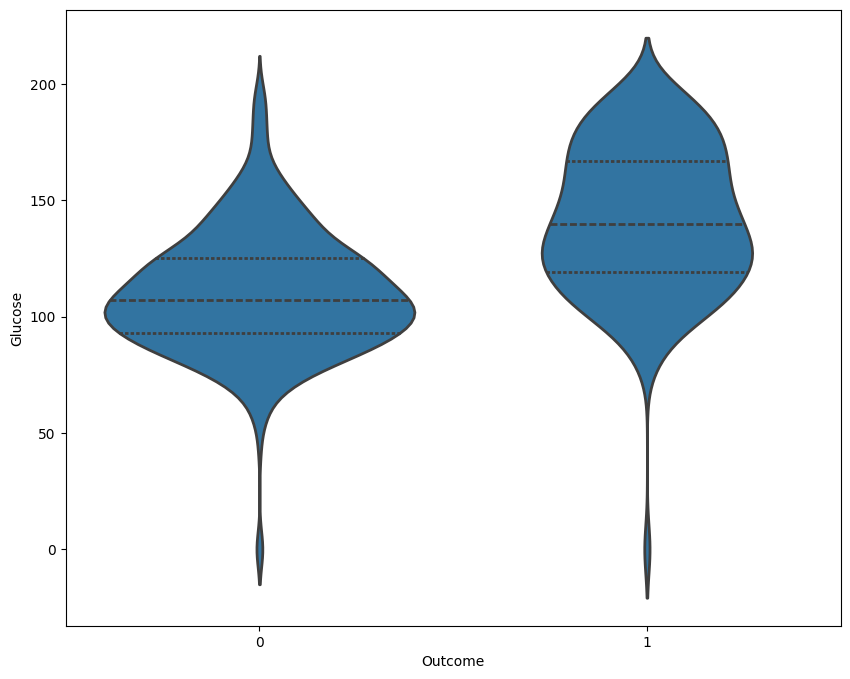

In [ ]:
plt.figure(figsize=(10,8))
sns.violinplot(data=dataset, x='Outcome', y='Glucose', split=False, linewidth=2, inner='quart')

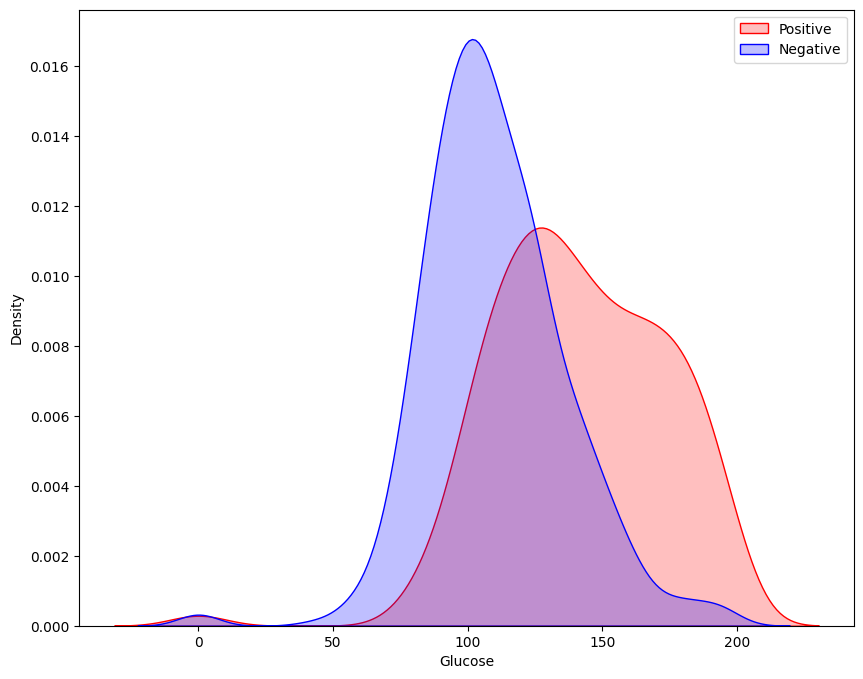

In [ ]:
plt.figure(figsize=(10,8))


sns.kdeplot(dataset[dataset['Outcome'] == 1]['Glucose'], color='red', fill=True, label='Positive')

sns.kdeplot(dataset[dataset['Outcome'] == 0]['Glucose'], color='blue', fill=True, label='Negative')


plt.xlabel('Glucose')
plt.ylabel('Density')


plt.legend()

plt.show()

In [ ]:
# Replace null values with the median of the respective columns
dataset['Glucose'] = dataset['Glucose'].replace(0, dataset['Glucose'].median())
dataset['BloodPressure'] = dataset['BloodPressure'].replace(0, dataset['BloodPressure'].median())
dataset['BMI'] = dataset['BMI'].replace(0, dataset['BMI'].median())
dataset['Insulin'] = dataset['Insulin'].replace(0, dataset['Insulin'].median())


In [ ]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,0,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,0,137,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63,0
764,2,122,70,27,30.5,36.8,0.340,27,0
765,5,121,72,23,112.0,26.2,0.245,30,0
766,1,126,60,0,30.5,30.1,0.349,47,1


In [ ]:
x= dataset.drop('Outcome', axis=1)
y= dataset['Outcome']

In [ ]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
464,10,115,98,0,30.5,24.0,1.022,34
223,7,142,60,33,190.0,28.8,0.687,61
393,4,116,72,12,87.0,22.1,0.463,37
766,1,126,60,0,30.5,30.1,0.349,47
570,3,78,70,0,30.5,32.5,0.270,39
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140.0,28.6,0.411,26
106,1,96,122,0,30.5,22.4,0.207,27
270,10,101,86,37,30.5,45.6,1.136,38
435,0,141,72,0,30.5,42.4,0.205,29


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
training_accuracy = []
testing_accuracy = []
for n_neighbours in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n_neighbours)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    testing_accuracy.append(knn.score(X_test, y_test))

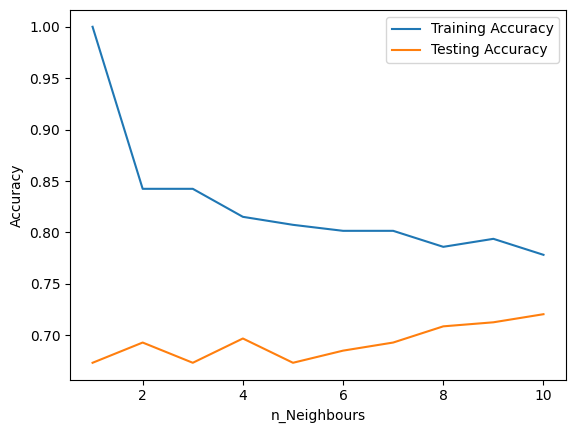

In [ ]:
plt.plot(range(1,11), training_accuracy, label='Training Accuracy')
plt.plot(range(1,11), testing_accuracy, label='Testing Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('n_Neighbours')
plt.legend()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Training Accuracy: ', knn.score(X_train, y_train))
print('Testing Accuracy: ', knn.score(X_test, y_test))

Training Accuracy:  0.7937743190661478
Testing Accuracy:  0.7125984251968503


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)
print('Training Accuracy: ', dt.score(X_train, y_train))
print('Testing Accuracy: ', dt.score(X_test, y_test))


Training Accuracy:  1.0
Testing Accuracy:  0.6850393700787402


In [ ]:
dt1 = DecisionTreeClassifier(max_depth=3, random_state=0)
dt1.fit(X_train, y_train)
print('Training Accuracy: ', dt1.score(X_train, y_train))
print('Testing Accuracy: ', dt1.score(X_test, y_test))


Training Accuracy:  0.7723735408560312
Testing Accuracy:  0.6929133858267716


In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print('Training Accuracy: ', mlp.score(X_train, y_train))
print('Testing Accuracy: ', mlp.score(X_test, y_test))

Training Accuracy:  0.7684824902723736
Testing Accuracy:  0.6889763779527559


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)
print('Training Accuracy: ', mlp.score(X_train_scaled, y_train))
print('Testing Accuracy: ', mlp.score(X_test_scaled, y_test))

Training Accuracy:  0.8365758754863813
Testing Accuracy:  0.7401574803149606


C:\Users\daksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
